In [34]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

import gc

%reload_ext tensorboard
log_folder = './logs8'

gc.collect()

torch.cuda.empty_cache()

#writer = SummaryWriter()

In [101]:
def get_data():
    data_dir = './Data'
    
    transform = transforms.Compose(
    [transforms.Resize((256,256)),
    transforms.ToTensor()])
    #transforms.Normalize((0.5), (0.5))])

    trainSet = datasets.ImageFolder(data_dir + '/TrainSet', transform=transform)
    print(len(trainSet))
    print(trainSet[0])
    #validSet = datasets.ImageFolder(data_dir + '/ValidSet', transform=transform)

    train = DataLoader(trainSet, batch_size=12, shuffle=True)
    #valid = DataLoader(test_set, batch_size=32, shuffle=True)

    return train#, test

In [102]:
def train_imshow():
    classes = ('Bad', 'Good')
    dataiter = iter(train)
    images, labels = dataiter.next()
    fig, axes = plt.subplots(figsize=(10, 4), ncols=5)
    for i in range(5):
        ax = axes[i]
        ax.imshow(images[i].permute(1, 2, 0))
        ax.title.set_text(' '.join('%5s' % classes[labels[i]]))
    plt.show()

110
(tensor([[[0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0078, 0.0078, 0.0078,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0078, 0.0078, 0.0078,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0000, 0.0000,  ..., 0.0039, 0.003

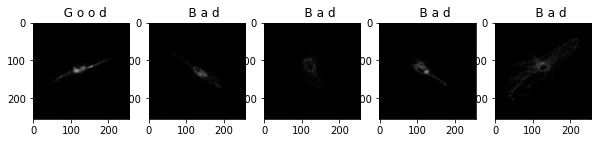

In [103]:
train = get_data()
print(train)
train_imshow()

In [104]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 11)
        self.maxpool = nn.MaxPool2d(3, 3)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.conv4 = nn.Conv2d(128, 128, 3)
        self.conv5 = nn.Conv2d(128, 64, 3)
        self.fc1 = nn.Linear(2304, 1152)
        self.fc2 = nn.Linear(1152, 1152)
        self.fc3 = nn.Linear(1152, 1)

    def forward(self, x):
        #print("input shape: ",x.shape)
        x = F.relu(self.conv1(x))
        #print("after conv1: ",x.shape)
        x = self.maxpool(x)
        #print("after maxpool1: ",x.shape)
        x = F.relu(self.conv2(x))
        #print("after conv2: ",x.shape)
        x = self.maxpool(x)
        #print("after maxpool2: ",x.shape)
        x = F.relu(self.conv3(x))
        #print("after conv3: ",x.shape)
        x = F.relu(self.conv4(x))
        #print("after conv4: ",x.shape)
        x = F.relu(self.conv5(x))
        #print("after conv5: ",x.shape)
        x = self.maxpool(x)
        #print("after maxpool3: ",x.shape)
        x = x.reshape(x.shape[0], -1)
        #print("after flattening: ",x.shape)
        x = F.relu(self.fc1(x))
        #print("after linear1: ",x.shape)
        x = F.relu(self.fc2(x))
        #print("after linear2: ",x.shape)
        x = self.fc3(x)
        #print("output shape: ",x.shape)
        return x


net = Net()

In [105]:
net = Net()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [106]:
"""
if torch.cuda.is_available(): # Checking if we can use GPU
    model = net.cuda()
    criterion = criterion.cuda()
"""

'\nif torch.cuda.is_available(): # Checking if we can use GPU\n    model = net.cuda()\n    criterion = criterion.cuda()\n'

In [107]:
epochs=15
loss_list =[]
for epoch in range(epochs):
    print(f'Starting epoch {epoch+1}')
    current_loss = 0.0
    for i, data in enumerate(train, 0):

        inputs, labels = data

        

        optimizer.zero_grad()
        outputs = net(inputs)
        labels = labels.unsqueeze(-1)
        labels = labels.to(torch.float32)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        current_loss += loss.item()
        if i == 9:
            print(f"Loss = {current_loss/110}")
            loss_list.append(current_loss)
            current_loss = 0.0

print('Finished Training')

Starting epoch 1
Loss = 0.0630534600127827
Starting epoch 2
Loss = 0.06304869272492149
Starting epoch 3
Loss = 0.06304235458374023
Starting epoch 4
Loss = 0.06309310035272078
Starting epoch 5
Loss = 0.06302628354592757
Starting epoch 6
Loss = 0.06303501671010797
Starting epoch 7
Loss = 0.06302930333397605
Starting epoch 8
Loss = 0.063010066205805
Starting epoch 9
Loss = 0.06300752813165839
Starting epoch 10
Loss = 0.06297376426783476
Starting epoch 11
Loss = 0.06304785717617381
Starting epoch 12
Loss = 0.0629978440024636
Starting epoch 13
Loss = 0.06299923387440769
Starting epoch 14
Loss = 0.06305164044553584
Starting epoch 15
Loss = 0.06305018013173884
Finished Training


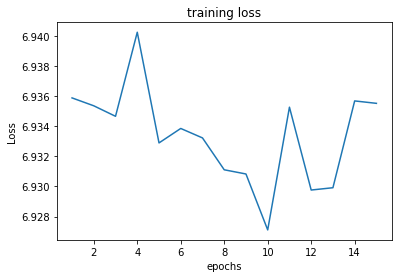

In [108]:
epochs = range(1,epochs+1)
plt.plot(epochs,loss_list)
plt.title("training loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend
plt.show()